In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1(1)

In [2]:
n = 20
x = np.linspace(-1,1,n+1)
u0 = np.zeros_like(x)
for i in range(len(x)):
    if np.abs(x[i])<=0.25:
        u0[i] = 1
l = 0.8

In [3]:
dx = 2/n
dt = l*dx

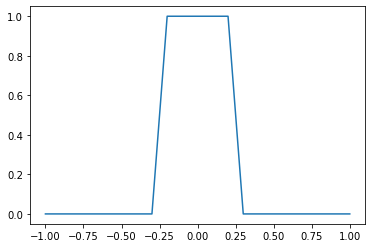

In [4]:
plt.plot(x,u0)

In [5]:
def ftbs(u, l):
    u1 = u.copy()
    u1[1:] = (1-l)*u[1:]+l*u[:n]
    u1[0] = (1-l)*u[0]+l*u[n]
    return u1

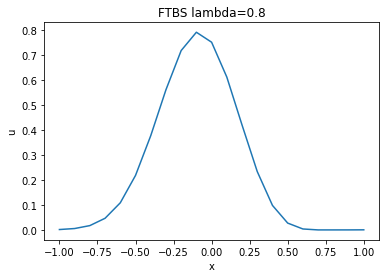

In [6]:
t=0
u = u0.copy()
while t<2:
    u = ftbs(u, l)
    t += dx*l
plt.plot(x,u)
plt.title('FTBS lambda=0.8')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

In [7]:
def ftcs(u, l):
    u1 = u.copy()
    u1[1:n] = (1)*u[1:n]-l*(u[2:]-u[:n-1])/2
    u1[0] = (1)*u[0]-l*(u[1]-u[n])/2
    u1[n] = (1)*u[n]-l*(u[0]-u[n-1])/2
    return u1

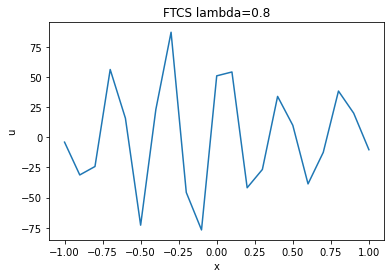

In [8]:
t=0
u = u0.copy()
while t<2:
    u = ftcs(u, l)
    t += dx*l
plt.plot(x,u)
plt.title('FTCS lambda=0.8')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

In [9]:
def btfs_mat(l):
    A = np.zeros((n+1,n+1))
    for i in range(n+1):
        A[i,i] = 1-l
        if i==n:
            A[i,0] = l
        else:
            A[i,i+1] = l
    return np.linalg.inv(A)

In [10]:
btfsMat = btfs_mat(l)

In [11]:
def btfs(u, l):
    u1 = np.matmul(btfsMat, u)
    return u1

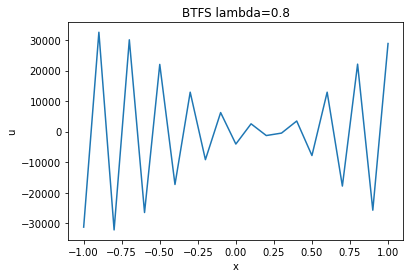

In [12]:
t=0
u = u0.copy()
while t<2:
    u = btfs(u, l)
    t += dx*l
plt.plot(x,u)
plt.title('BTFS lambda=0.8')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

In [13]:
def btbs_mat(l):
    A = np.zeros((n+1,n+1))
    for i in range(n+1):
        A[i,i] = 1+l
        if i==0:
            A[i,n] = -l
        else:
            A[i,i-1] = -l
    return np.linalg.inv(A)

In [14]:
btbsMat = btbs_mat(l)

In [15]:
def btbs(u, l):
    u1 = np.matmul(btbsMat, u)
    return u1

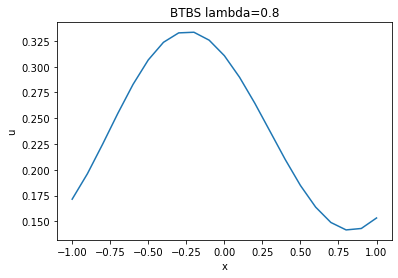

In [16]:
t=0
u = u0.copy()
while t<2:
    u = btbs(u, l)
    t += dx*l
plt.plot(x,u)
plt.title('BTBS lambda=0.8')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

In [17]:
def btcs_mat(l,n):
    A = np.zeros((n+1,n+1))
    for i in range(n+1):
        A[i,i] = 1
        if i==0:
            A[i,n] = -l/2
            A[i,i+1] = l/2
        elif i==n:
            A[i,0] = l/2
            A[i,i-1] = -l/2
        else:
            A[i,i-1] = -l/2
            A[i,i+1] = l/2
    return np.linalg.inv(A)

In [18]:
btcsMat = btcs_mat(l,n)

In [19]:
def btcs(u, l):
    u1 = np.matmul(btcsMat, u)
    return u1

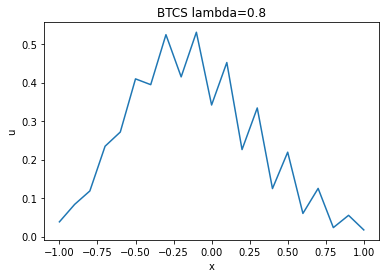

In [20]:
t=0
u = u0.copy()
while t<2:
    u = btcs(u, l)
    t += dx*l
plt.plot(x,u)
plt.title('BTCS lambda=0.8')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

In [21]:
def ctbs(u, u_prev, l):
    u1 = u.copy()
    u1[1:] = (1)*u_prev[1:]-2*l*(u[1:]-u[:n])
    u1[0] = (1)*u_prev[0]-2*l*(u[0]-u[n])
    return u1, u

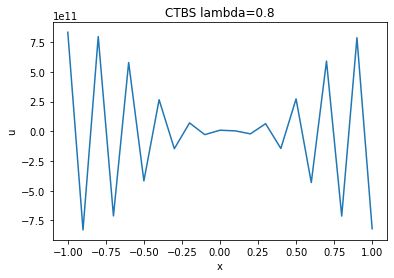

In [22]:
t=dx*l
u_prev = u0.copy()
u = ftbs(u0,l)
while t<2:
    u, u_prev = ctbs(u, u_prev, l)
    t += dx*l
plt.plot(x,u)
plt.title('CTBS lambda=0.8')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

In [23]:
def ctcs(u, u_prev, l):
    u1 = u.copy()
    u1[1:n] = (1)*u_prev[1:n]-l*(u[2:]-u[:n-1])
    u1[0] = (1)*u_prev[0]-l*(u[1]-u[n])
    u1[n] = 1*u_prev[n]-l*(u[0]-u[n-1])
    return u1, u

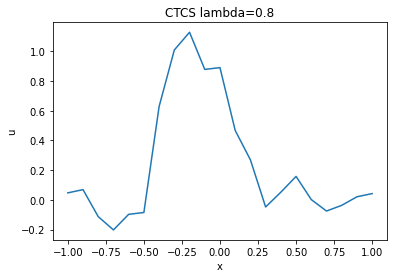

In [24]:
t=dx*l
u_prev = u0.copy()
u = ftbs(u0,l)
while t<2:
    u, u_prev = ctcs(u, u_prev, l)
    t += dx*l
plt.plot(x,u)
plt.title('CTCS lambda=0.8')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

### Problem 1(2)

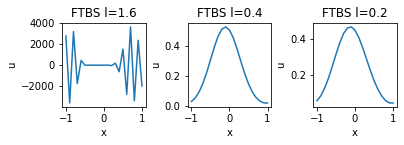

In [25]:
l1 = [1.6,0.4,0.2]
for i in range(3):
    t=0
    u = u0.copy()
    while t<2:
        u = ftbs(u, l1[i])
        t += dx*l1[i]
    plt.subplot(1,3,i+1,box_aspect=1)
    plt.plot(x,u)
    plt.title('FTBS l='+str(l1[i]))
    plt.xlabel('x')
    plt.ylabel('u')
plt.subplots_adjust(wspace=0.5)
plt.show()

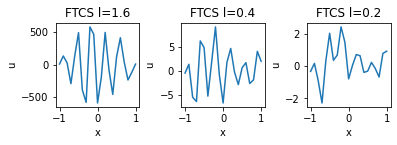

In [26]:
for i in range(3):
    t=0
    u = u0.copy()
    while t<2:
        u = ftcs(u, l1[i])
        t += dx*l1[i]
    plt.subplot(1,3,i+1,box_aspect=1)
    plt.plot(x,u)
    plt.title('FTCS l='+str(l1[i]))
    plt.xlabel('x')
    plt.ylabel('u')
plt.subplots_adjust(wspace=0.5)
plt.show()

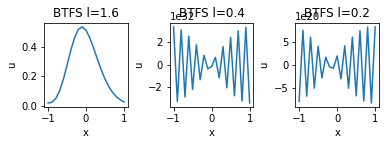

In [27]:
for i in range(3):
    btfsMat = btfs_mat(l1[i])
    t=0
    u = u0.copy()
    while t<2:
        u = btfs(u, l1[i])
        t += dx*l1[i]
    plt.subplot(1,3,i+1,box_aspect=1)
    plt.plot(x,u)
    plt.title('BTFS l='+str(l1[i]))
    plt.xlabel('x')
    plt.ylabel('u')
plt.subplots_adjust(wspace=0.5)
plt.show()

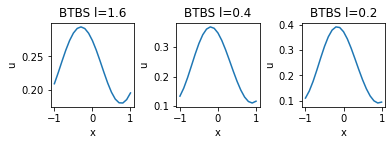

In [28]:
for i in range(3):
    btbsMat = btbs_mat(l1[i])
    t=0
    u = u0.copy()
    while t<2:
        u = btbs(u, l1[i])
        t += dx*l1[i]
    plt.subplot(1,3,i+1,box_aspect=1)
    plt.plot(x,u)
    plt.title('BTBS l='+str(l1[i]))
    plt.xlabel('x')
    plt.ylabel('u')
plt.subplots_adjust(wspace=0.5)
plt.show()

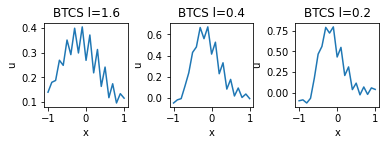

In [29]:
for i in range(3):
    btcsMat = btcs_mat(l1[i],n)
    t=0
    u = u0.copy()
    while t<2:
        u = btcs(u, l1[i])
        t += dx*l1[i]
    plt.subplot(1,3,i+1,box_aspect=1)
    plt.plot(x,u)
    plt.title('BTCS l='+str(l1[i]))
    plt.xlabel('x')
    plt.ylabel('u')
plt.subplots_adjust(wspace=0.5)
plt.show()

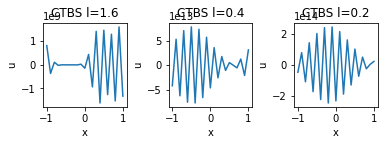

In [30]:
for i in range(3):
    t=dx*l1[i]
    u_prev = u0.copy()
    u = ftbs(u0,l1[i])
    while t<2:
        u, u_prev = ctbs(u, u_prev, l1[i])
        t += dx*l1[i]
    plt.subplot(1,3,i+1,box_aspect=1)
    plt.plot(x,u)
    plt.title('CTBS l='+str(l1[i]))
    plt.xlabel('x')
    plt.ylabel('u')
plt.subplots_adjust(wspace=0.5)
plt.show()

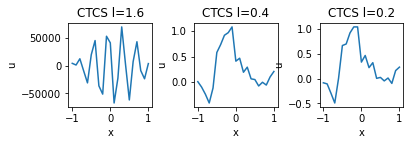

In [31]:
for i in range(3):
    t=dx*l1[i]
    u_prev = u0.copy()
    u = ftbs(u0,l1[i])
    while t<2:
        u, u_prev = ctcs(u, u_prev, l1[i])
        t += dx*l1[i]
    plt.subplot(1,3,i+1,box_aspect=1)
    plt.plot(x,u)
    plt.title('CTCS l='+str(l1[i]))
    plt.xlabel('x')
    plt.ylabel('u')
plt.subplots_adjust(wspace=0.5)
plt.show()

### Problem 1(6)

In [32]:
dx1 = [0.05,0.005]
l = 0.2
err = np.zeros(2)
for i in range(2):
    x = np.linspace(-1,1,int(2/dx1[i])+1)
    u0 = np.sin(np.pi*(x))
    btcsMat = btcs_mat(l,int(2/dx1[i]))
    t=0
    u = u0.copy()
    while t<2:
        u = btcs(u, l)
        t += dx1[i]*l
    u_ex = np.sin(np.pi*(x-2))
    e = np.abs(u-u_ex)
    err[i] = max(e)
p = np.log(err[0]/err[1])/np.log(dx1[0]/dx1[1])
print('Global order of accuracy for BTCS: ',p)

Global order of accuracy for BTCS:  1.0376082519633594


### Problem 2(1)

In [33]:
n = 20
x = np.linspace(-1,1,n+1)
u0 = np.zeros_like(x)
for i in range(len(x)):
    if np.abs(x[i])<=0.25:
        u0[i] = 1
l = 0.8
dx = 2/n
dt = l*dx

In [34]:
def ft(u, l, a):
    u1 = u.copy()
    u1[1:n] = (1-l*np.abs(a))*u[1:n] + l*max(a,0)*u[:n-1] -l*min(a,0)*u[2:]
    u1[0] =  (1-l*np.abs(a))*u[0] + l*max(a,0)*u[n] -l*min(a,0)*u[1]
    u1[n] = (1-l*np.abs(a))*u[n] + l*max(a,0)*u[n-1] -l*min(a,0)*u[0]
    return u1

### Problem 2(2)

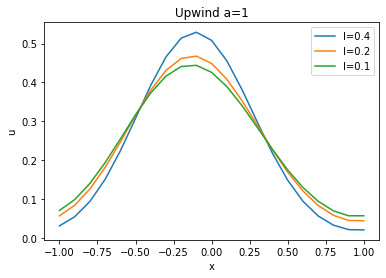

In [35]:
l2 = [0.4,0.2,0.1]
for i in range(3):
    t=0
    u = u0.copy()
    while t<2:
        u = ft(u, l2[i], 1)
        t += dx*l2[i]
    plt.plot(x,u,label='l='+str(l2[i]))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Upwind a=1')
plt.legend()
plt.show()

### Problem 2(3)

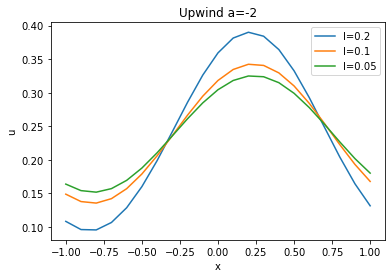

In [36]:
l3 = [0.2,0.1,0.05]
for i in range(3):
    t=0
    u = u0.copy()
    while t<2:
        u = ft(u, l3[i], -2)
        t += dx*l3[i]
    plt.plot(x,u,label='l='+str(l3[i]))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Upwind a=-2')
plt.legend()
plt.show()